In [1]:
import pandas as pd



In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape()

TypeError: 'tuple' object is not callable

In [5]:
df.shape


(301, 9)

In [6]:
print(df['Seller_Type'].unique())
print(df['Owner'].unique())
print(df['Transmission'].unique())

['Dealer' 'Individual']
[0 1 3]
['Manual' 'Automatic']


In [7]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Above line shown there is not null cell in the CSV


# There is columnn name year.
# This result in decreasing the price of car year to year.

In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

# Car name is of no use here. WE need numbers to make predictions. 

# Hence we delete this data


In [11]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Now to see how old car is we need to 2020-Year 
# So we introduce a new feature Current_year

In [13]:
final_dataset['Current_Year']=2020

In [14]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [15]:
final_dataset['Number_of_years']=final_dataset['Current_Year']-final_dataset['Year']

In [16]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_of_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


# Now both Year are of no use to use so we just drop it

In [17]:
final_dataset.drop(['Current_Year'],axis=1,inplace=True)
final_dataset.drop(['Year'],axis=1,inplace=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [19]:
pd.get_dummies(final_dataset)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,6,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,7,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,3,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,9,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,6,0,1,0,1,0,0,1
5,9.25,9.83,2071,0,2,0,1,0,1,0,0,1
6,6.75,8.12,18796,0,5,0,0,1,1,0,0,1
7,6.50,8.61,33429,0,5,0,1,0,1,0,0,1
8,8.75,8.89,20273,0,4,0,1,0,1,0,0,1
9,7.45,8.92,42367,0,5,0,1,0,1,0,0,1


In [20]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [21]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


# IF 100 then if 00 it means val is 1 so its a dummy variable
# eg cng pet diesel if cng and pet is 0 0 then val belong to diesel
# here we dropped cng

In [22]:
import seaborn as sns

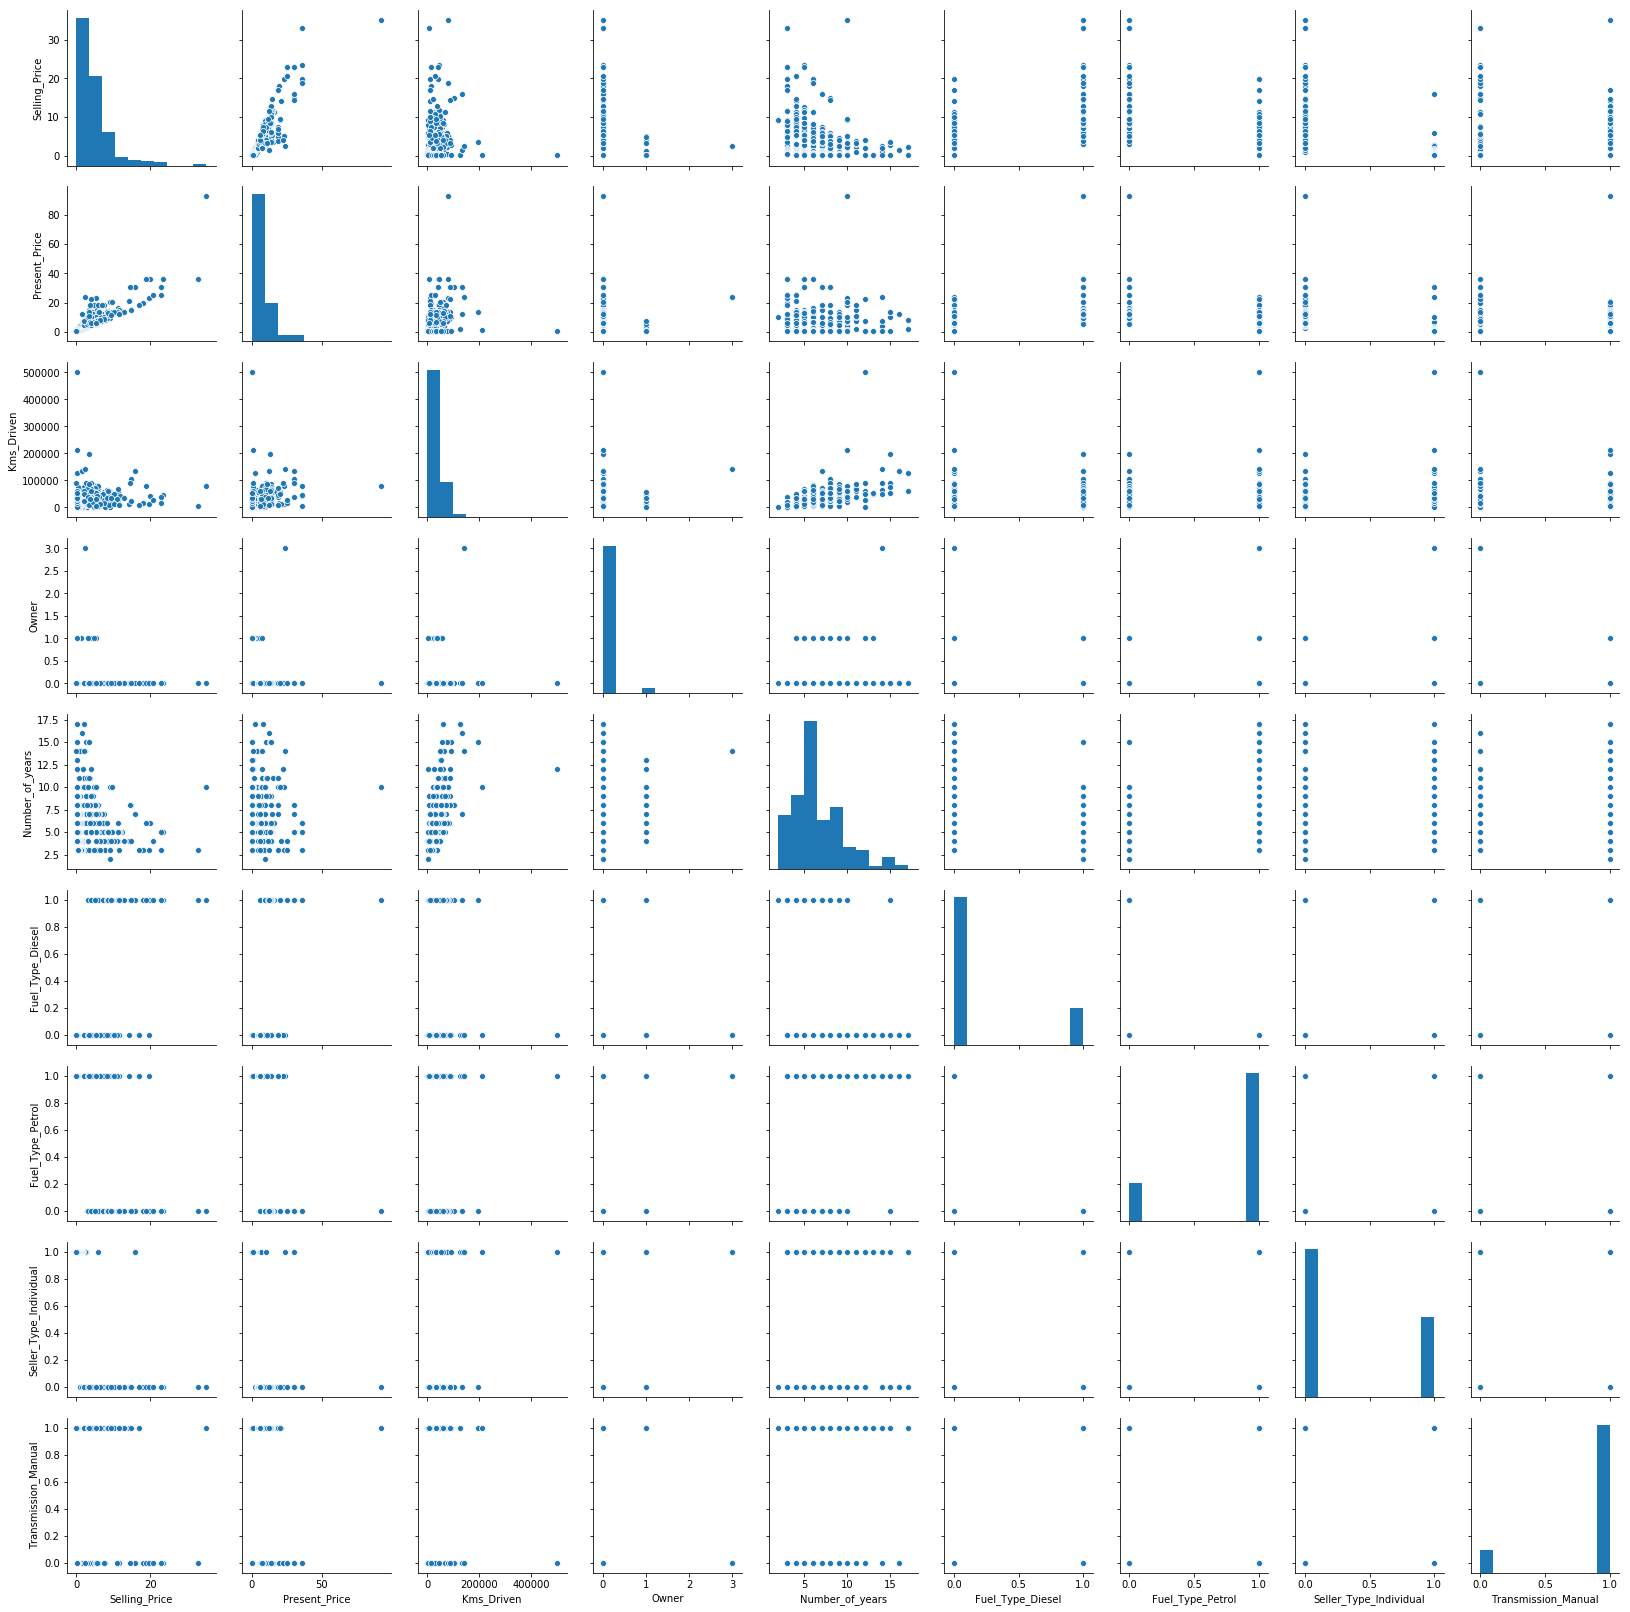

In [23]:
sns.pairplot(final_dataset)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


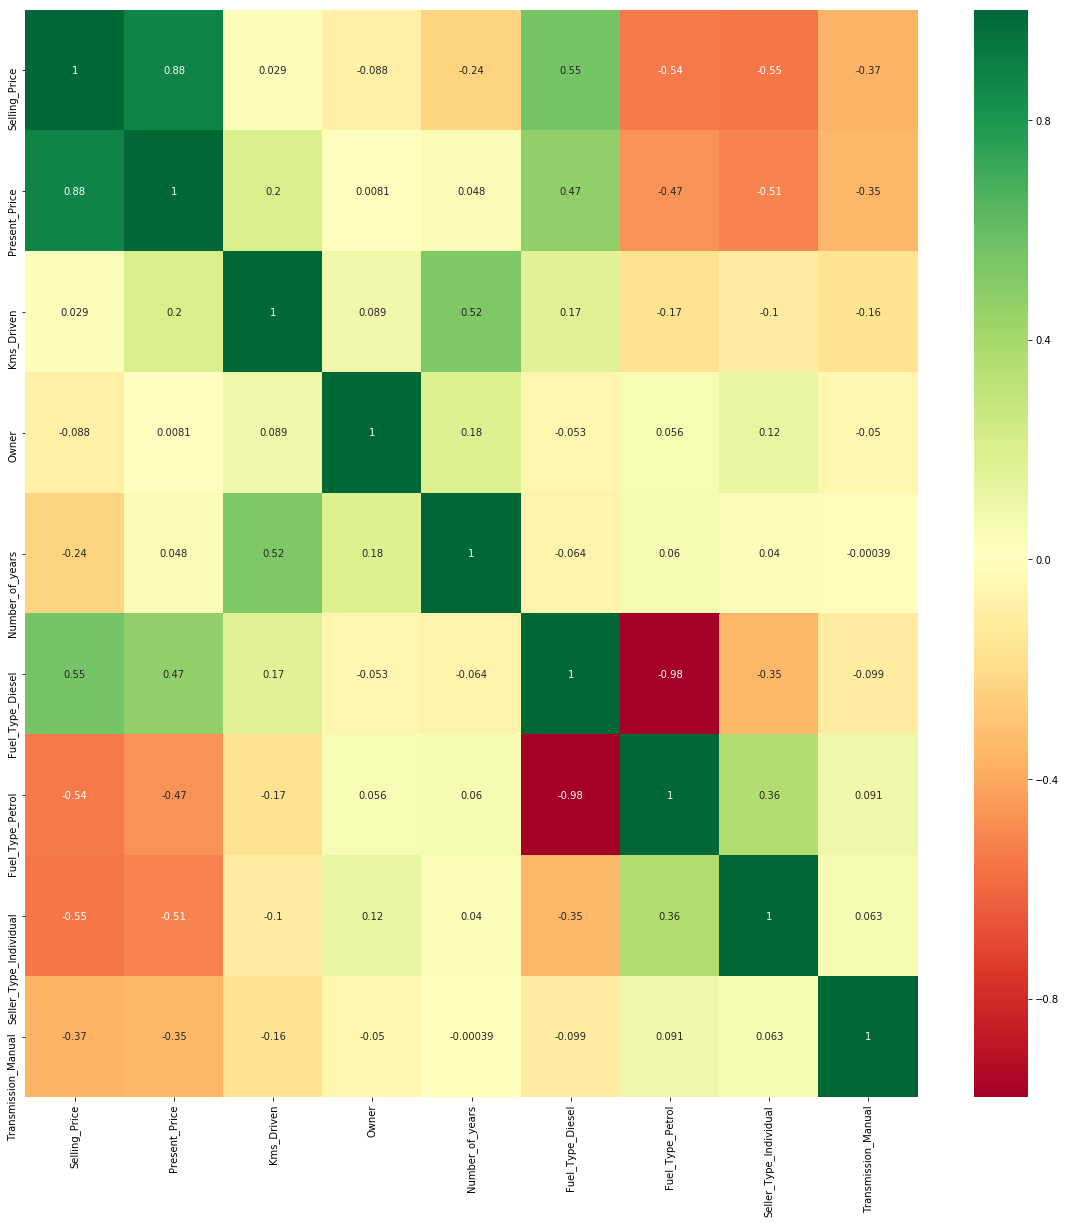

In [29]:
correlation_matrix=final_dataset.corr()
top_corr_features=correlation_matrix.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [30]:
X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]
# creating all dependent and independent features.

In [31]:
X.head()

,Present_Price,Kms_Driven,Owner,Number_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [32]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y)

/home/pritesh/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
print(model.feature_importances_)

[0.57018487 0.04022299 0.00059074 0.08583156 0.13112966 0.0146513
 0.07723689 0.08015199]


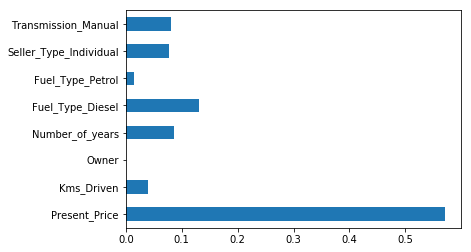

In [37]:
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.plot(kind='barh')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [39]:
X_train.shape

(210, 8)

In [40]:
X_test.shape

(91, 8)

In [48]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf_random=RandomForestRegressor
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [44]:
# Different decision tree values.

In [49]:
#no of features to consider in every split
max_features=['auto','sqrt']
#max no of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
#mini no of samples requrired to split a node
min_samples_split=[2,5,10,15,100]
#mini no of samples required at each leaf node
min_samples_leaf=[1,2,5,10]

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
random_grid={
   'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf
}

In [54]:
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [55]:
# initialize a random forest regressor

In [56]:
rf=RandomForestRegressor()

In [59]:
rf_random=RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    scoring='neg_mean_squared_error',
    n_iter=10,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1

)

In [60]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.5s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   19.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [61]:
predictions=rf_random.predict(X_test)

In [62]:
predictions

array([ 6.19174,  0.32819,  5.31675,  0.35341,  7.91172,  0.53418,
        0.89873,  2.83463,  4.82463,  0.62113,  0.86825,  0.89964,
        4.20845,  0.56879,  1.04503,  2.90865,  0.60503,  1.384  ,
        8.38127,  1.11316,  0.62126,  5.15319,  1.24653,  7.63593,
       21.58821,  0.8296 , 20.29385,  8.70636,  0.45811,  0.31204,
        5.70587,  2.96147,  7.10463,  0.98536,  2.97845,  2.85378,
        9.29803,  3.59146,  5.1879 ,  1.13232,  3.61227,  3.7958 ,
        7.99229,  5.289  ,  5.96039,  0.69051,  0.55551,  6.28274,
        4.87801,  5.21885,  5.40145,  6.08638,  0.98922,  8.72413,
        4.03295,  4.1275 ,  6.98536,  0.5245 ,  5.80488,  5.38754,
        2.75997,  7.7125 , 10.07538,  7.38284,  0.39152,  0.49957,
        1.12046,  4.05039,  4.31889, 13.20139,  3.15425,  3.16487,
        0.34475,  9.53131,  0.45503,  5.0018 ,  5.815  , 10.70696,
        2.67973,  5.19152, 11.00635,  7.40265,  8.26267,  8.06896,
        0.64942,  3.6505 ,  2.37096,  4.36355,  5.07801, 12.74

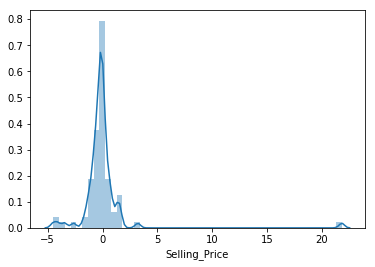

In [64]:
sns.distplot(Y_test-predictions)

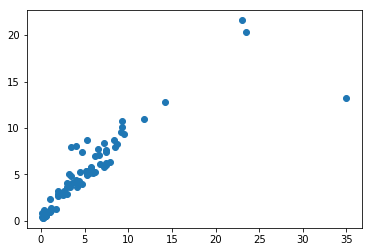

In [65]:
plt.scatter(Y_test,predictions)

In [66]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)


In [71]:


from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))



MAE: 0.9176047252747201
MSE: 6.39235678813299
RMSE: 2.528311054465607
